In [37]:
from urllib.request import urlretrieve
import zipfile
import pandas as pd

users_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv(
    'data/u.user', sep='|', names=users_cols, encoding='latin-1')

ratings_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(
    'data/u.data', sep='\t', names=ratings_cols, encoding='latin-1')

# The movies file contains a binary feature for each genre.
genre_cols = [
    "genre_unknown", "Action", "Adventure", "Animation", "Children", "Comedy",
    "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror",
    "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western",
]
movies_cols = [
    'movie_id', 'title', 'release_date', "video_release_date", "imdb_url"
] + genre_cols
movies = pd.read_csv(
    'data/u.item', sep='|', names=movies_cols, encoding='latin-1')

# Since the ids start at 1, we shift them to start at 0.
users["user_id"] = users["user_id"].apply(lambda x: str(x-1))
movies["movie_id"] = movies["movie_id"].apply(lambda x: str(x-1))
movies["year"] = movies['release_date'].apply(lambda x: str(x).split('-')[-1])
ratings["movie_id"] = ratings["movie_id"].apply(lambda x: str(x-1))
ratings["user_id"] = ratings["user_id"].apply(lambda x: str(x-1))
ratings["rating"] = ratings["rating"].apply(lambda x: float(x))

In [38]:
movies

,movie_id,title,release_date,video_release_date,imdb_url,genre_unknown,Action,Adventure,Animation,Children,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,0,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1995
1,1,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,2,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,3,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
4,4,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
5,5,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
6,6,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1995
7,7,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1995
8,8,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
9,9,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1996


In [39]:
ratings

,user_id,movie_id,rating,unix_timestamp
0,0,9,3.0,881250949
1,1,1,3.0,891717742
2,0,2,1.0,878887116
3,9,0,2.0,880606923
4,8,0,1.0,886397596
5,7,0,4.0,884182806
6,0,8,2.0,881171488
7,1,6,5.0,891628467
8,2,7,3.0,886324817
9,0,4,3.0,883603013


In [40]:
users

,user_id,age,sex,occupation,zip_code
0,0,24,M,technician,85711
1,1,53,F,other,94043
2,2,23,M,writer,32067
3,3,24,M,technician,43537
4,4,33,F,other,15213
5,5,42,M,executive,98101
6,6,57,M,administrator,91344
7,7,36,M,administrator,5201
8,8,29,M,student,1002
9,9,53,M,lawyer,90703


In [44]:
import numpy as np

genre_occurences = movies[genre_cols].sum().to_dict()
print(genre_occurences)

genres_encoded = {x: i for i, x in enumerate(genre_cols)}

print(genre_cols)


def get_genres(movies, genres):
    def get_all_genres(gs):
        active = [str(genres_encoded[genre]) for genre, g in zip(genres, gs) if g==1]
        if len(active) == 0:
            return '0'
        return ','.join((active))
    movies['all_genres'] = [
        get_all_genres(gs) for gs in zip(*[movies[genre] for genre in genres])]

get_genres(movies, genre_cols) # 각 유저가 본 장르 얻기
print(movies['all_genres'])

{'genre_unknown': 0, 'Action': 2, 'Adventure': 1, 'Animation': 1, 'Children': 2, 'Comedy': 3, 'Crime': 1, 'Documentary': 0, 'Drama': 7, 'Fantasy': 0, 'Film-Noir': 0, 'Horror': 0, 'Musical': 0, 'Mystery': 0, 'Romance': 0, 'Sci-Fi': 1, 'Thriller': 3, 'War': 1, 'Western': 0}
['genre_unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
0     3,4,5
1    1,2,16
2        16
3     1,5,8
4    6,8,16
5         8
6      8,15
7     4,5,8
8         8
9      8,17
Name: all_genres, dtype: object


In [45]:
movies

,movie_id,title,release_date,video_release_date,imdb_url,genre_unknown,Action,Adventure,Animation,Children,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year,all_genres
0,0,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1995,"3,4,5"
1,1,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1995,"1,2,16"
2,2,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1995,16
3,3,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1995,"1,5,8"
4,4,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,1,0,0,1995,"6,8,16"
5,5,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1995,8
6,6,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1995,"8,15"
7,7,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,1995,"4,5,8"
8,8,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1995,8
9,9,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1996,"8,17"


In [46]:
rating_details_sample = ratings.merge(movies, on='movie_id').merge(users, on='user_id')


In [47]:
rating_details_sample.shape

(18, 33)

In [48]:
rating_details_sample

,user_id,movie_id,rating,unix_timestamp,title,release_date,video_release_date,imdb_url,genre_unknown,Action,...,Sci-Fi,Thriller,War,Western,year,all_genres,age,sex,occupation,zip_code
0,0,9,3.0,881250949,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,...,0,0,1,0,1996,"8,17",24,M,technician,85711
1,0,2,1.0,878887116,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,...,0,1,0,0,1995,16,24,M,technician,85711
2,0,8,2.0,881171488,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,...,0,0,0,0,1995,8,24,M,technician,85711
3,0,4,3.0,883603013,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,...,0,1,0,0,1995,"6,8,16",24,M,technician,85711
4,7,9,5.0,879270459,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,...,0,0,1,0,1996,"8,17",36,M,administrator,5201
5,7,0,4.0,884182806,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,...,0,0,0,0,1995,"3,4,5",36,M,administrator,5201
6,7,6,3.0,888104457,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,...,1,0,0,0,1995,"8,15",36,M,administrator,5201
7,1,1,3.0,891717742,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,...,0,1,0,0,1995,"1,2,16",53,F,other,94043
8,1,6,5.0,891628467,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,...,1,0,0,0,1995,"8,15",53,F,other,94043
9,6,1,5.0,876042340,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,...,0,1,0,0,1995,"1,2,16",57,M,administrator,91344


In [49]:
rating_details_sample['user_id']=rating_details_sample['user_id'].astype(int)
rating_details_sample['movie_id']=rating_details_sample['movie_id'].astype(int)

In [50]:
rating_details_sample=rating_details_sample.set_index(['user_id','unix_timestamp']).sort_index()
rating_details_sample =rating_details_sample.reset_index()


In [51]:
rating_details_sample

,user_id,unix_timestamp,movie_id,rating,title,release_date,video_release_date,imdb_url,genre_unknown,Action,...,Sci-Fi,Thriller,War,Western,year,all_genres,age,sex,occupation,zip_code
0,0,878887116,2,1.0,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,...,0,1,0,0,1995,16,24,M,technician,85711
1,0,881171488,8,2.0,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,...,0,0,0,0,1995,8,24,M,technician,85711
2,0,881250949,9,3.0,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,...,0,0,1,0,1996,"8,17",24,M,technician,85711
3,0,883603013,4,3.0,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,...,0,1,0,0,1995,"6,8,16",24,M,technician,85711
4,1,891628467,6,5.0,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,...,1,0,0,0,1995,"8,15",53,F,other,94043
5,1,891717742,1,3.0,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,...,0,1,0,0,1995,"1,2,16",53,F,other,94043
6,2,879781125,2,5.0,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,...,0,1,0,0,1995,16,23,M,writer,32067
7,2,886324817,7,3.0,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,...,0,0,0,0,1995,"4,5,8",23,M,writer,32067
8,3,879539794,7,2.0,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,...,0,0,0,0,1995,"4,5,8",24,M,technician,43537
9,4,879372434,3,2.0,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,...,0,0,0,0,1995,"1,5,8",33,F,other,15213


In [52]:
# Get the like and dislike movie list

import numpy as np
rating_details_sample['movie_type']=np.where(rating_details_sample['rating'] >= 3, 'like', 'dislike') # 3보다 크면 like
rating_details_sample['movie_name']=rating_details_sample['title'].str[:-6] # 년도 부분 자르기

In [53]:
rating_details_sample

,user_id,unix_timestamp,movie_id,rating,title,release_date,video_release_date,imdb_url,genre_unknown,Action,...,War,Western,year,all_genres,age,sex,occupation,zip_code,movie_type,movie_name
0,0,878887116,2,1.0,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,...,0,0,1995,16,24,M,technician,85711,dislike,Four Rooms
1,0,881171488,8,2.0,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,...,0,0,1995,8,24,M,technician,85711,dislike,Dead Man Walking
2,0,881250949,9,3.0,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,...,1,0,1996,"8,17",24,M,technician,85711,like,Richard III
3,0,883603013,4,3.0,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,...,0,0,1995,"6,8,16",24,M,technician,85711,like,Copycat
4,1,891628467,6,5.0,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,...,0,0,1995,"8,15",53,F,other,94043,like,Twelve Monkeys
5,1,891717742,1,3.0,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,...,0,0,1995,"1,2,16",53,F,other,94043,like,GoldenEye
6,2,879781125,2,5.0,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,...,0,0,1995,16,23,M,writer,32067,like,Four Rooms
7,2,886324817,7,3.0,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,...,0,0,1995,"4,5,8",23,M,writer,32067,like,Babe
8,3,879539794,7,2.0,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,...,0,0,1995,"4,5,8",24,M,technician,43537,dislike,Babe
9,4,879372434,3,2.0,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,...,0,0,1995,"1,5,8",33,F,other,15213,dislike,Get Shorty


In [54]:
user_ids = rating_details_sample["user_id"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}

movie_ids = rating_details_sample["movie_id"].unique().tolist()
movie2movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded2movie = {i: x for i, x in enumerate(movie_ids)}


title_ids = rating_details_sample["movie_name"].unique().tolist()
title2title_encoded = {x: i for i, x in enumerate(title_ids)}
title_encoded2title = {i: x for i, x in enumerate(title_ids)}

rating_details_sample["user"] = rating_details_sample["user_id"].map(user2user_encoded)
rating_details_sample["movie"] = rating_details_sample["movie_id"].map(movie2movie_encoded)
rating_details_sample["title_d"] = rating_details_sample["movie_name"].map(title2title_encoded)

In [55]:
rating_details_sample

,user_id,unix_timestamp,movie_id,rating,title,release_date,video_release_date,imdb_url,genre_unknown,Action,...,all_genres,age,sex,occupation,zip_code,movie_type,movie_name,user,movie,title_d
0,0,878887116,2,1.0,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,...,16,24,M,technician,85711,dislike,Four Rooms,0,0,0
1,0,881171488,8,2.0,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,...,8,24,M,technician,85711,dislike,Dead Man Walking,0,1,1
2,0,881250949,9,3.0,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,...,"8,17",24,M,technician,85711,like,Richard III,0,2,2
3,0,883603013,4,3.0,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,...,"6,8,16",24,M,technician,85711,like,Copycat,0,3,3
4,1,891628467,6,5.0,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,...,"8,15",53,F,other,94043,like,Twelve Monkeys,1,4,4
5,1,891717742,1,3.0,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,...,"1,2,16",53,F,other,94043,like,GoldenEye,1,5,5
6,2,879781125,2,5.0,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,...,16,23,M,writer,32067,like,Four Rooms,2,0,0
7,2,886324817,7,3.0,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,...,"4,5,8",23,M,writer,32067,like,Babe,2,6,6
8,3,879539794,7,2.0,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,...,"4,5,8",24,M,technician,43537,dislike,Babe,3,6,6
9,4,879372434,3,2.0,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,...,"1,5,8",33,F,other,15213,dislike,Get Shorty,4,7,7


In [56]:
sample_data=rating_details_sample[['user','occupation','sex']]
sample_data=sample_data.reset_index()

In [57]:
sample_data

,index,user,occupation,sex
0,0,0,technician,M
1,1,0,technician,M
2,2,0,technician,M
3,3,0,technician,M
4,4,1,other,F
5,5,1,other,F
6,6,2,writer,M
7,7,2,writer,M
8,8,3,technician,M
9,9,4,other,F


In [58]:
rating_details_sample["movie"].max()

9

In [59]:
movie_list = rating_details_sample.groupby(['user','movie_type'])['movie'].apply(list).reset_index()
title_list = rating_details_sample.groupby(['user'])['title_d'].apply(list).reset_index()
genre_list = rating_details_sample.groupby(['user'])['all_genres'].unique().apply(list).reset_index()

# Get the unique set of genre for all the users
genre_list['all_genres']=genre_list['all_genres'].apply(lambda x: list(set(','.join(x))) ) # 중복제거
genre_list['all_genres']=genre_list['all_genres'].apply(lambda x:[ x for x in x if x.isdigit() ])

In [60]:
movie_list

,user,movie_type,movie
0,0,dislike,"[0, 1]"
1,0,like,"[2, 3]"
2,1,like,"[4, 5]"
3,2,like,"[0, 6]"
4,3,dislike,[6]
5,4,dislike,[7]
6,5,like,[8]
7,6,like,"[5, 6]"
8,7,like,"[2, 9, 4]"
9,8,dislike,[9]


In [61]:
title_list

,user,title_d
0,0,"[0, 1, 2, 3]"
1,1,"[4, 5]"
2,2,"[0, 6]"
3,3,[6]
4,4,[7]
5,5,[8]
6,6,"[5, 6]"
7,7,"[2, 9, 4]"
8,8,[9]
9,9,[9]


In [62]:
genre_list

,user,all_genres
0,0,"[6, 8, 1, 7]"
1,1,"[6, 2, 5, 8, 1]"
2,2,"[6, 5, 8, 1, 4]"
3,3,"[5, 8, 4]"
4,4,"[5, 8, 1]"
5,5,[8]
6,6,"[6, 2, 5, 8, 1, 4]"
7,7,"[5, 8, 1, 3, 7, 4]"
8,8,"[5, 3, 4]"
9,9,"[5, 3, 4]"


In [63]:
user_video_list = movie_list.pivot(index='user', columns='movie_type', values='movie').reset_index()

In [64]:
user_video_list

movie_type,user,dislike,like
0,0,"[0, 1]","[2, 3]"
1,1,NaN,"[4, 5]"
2,2,NaN,"[0, 6]"
3,3,[6],NaN
4,4,[7],NaN
5,5,NaN,[8]
6,6,NaN,"[5, 6]"
7,7,NaN,"[2, 9, 4]"
8,8,[9],NaN
9,9,[9],NaN


In [65]:
user_video_list.fillna(rating_details_sample["movie"].max()+1, inplace=True)

In [66]:
user_video_list

movie_type,user,dislike,like
0,0,"[0, 1]","[2, 3]"
1,1,10,"[4, 5]"
2,2,10,"[0, 6]"
3,3,[6],10
4,4,[7],10
5,5,10,[8]
6,6,10,"[5, 6]"
7,7,10,"[2, 9, 4]"
8,8,[9],10
9,9,[9],10


In [67]:
sample_data = sample_data.drop('index',axis=1)
sample_data = sample_data.drop_duplicates()

In [68]:
sample_data

,user,occupation,sex
0,0,technician,M
4,1,other,F
6,2,writer,M
8,3,technician,M
9,4,other,F
10,5,executive,M
11,6,administrator,M
13,7,administrator,M
16,8,student,M
17,9,lawyer,M


In [69]:
user_final_list = pd.merge(user_video_list,title_list, how= 'left')
user_title_list1 = pd.merge(user_final_list,genre_list, how='left')
user_title_list = pd.merge(user_title_list1,sample_data, how='left')

In [70]:
user_title_list

,user,dislike,like,title_d,all_genres,occupation,sex
0,0,"[0, 1]","[2, 3]","[0, 1, 2, 3]","[6, 8, 1, 7]",technician,M
1,1,10,"[4, 5]","[4, 5]","[6, 2, 5, 8, 1]",other,F
2,2,10,"[0, 6]","[0, 6]","[6, 5, 8, 1, 4]",writer,M
3,3,[6],10,[6],"[5, 8, 4]",technician,M
4,4,[7],10,[7],"[5, 8, 1]",other,F
5,5,10,[8],[8],[8],executive,M
6,6,10,"[5, 6]","[5, 6]","[6, 2, 5, 8, 1, 4]",administrator,M
7,7,10,"[2, 9, 4]","[2, 9, 4]","[5, 8, 1, 3, 7, 4]",administrator,M
8,8,[9],10,[9],"[5, 3, 4]",student,M
9,9,[9],10,[9],"[5, 3, 4]",lawyer,M


In [71]:
user_title_list['like'] =user_title_list['like'].apply(lambda x: x if type(x) is list else [x])
user_title_list['dislike'] =user_title_list['dislike'].apply(lambda x: x if type(x) is list else [x])
user_title_list['predict_labels'] = user_title_list['like'].apply(lambda x: (x[-1])) #label을 마지막 값으로..
user_title_list['like']=user_title_list['like'].apply(lambda x: (x[:-1]))


In [72]:
user_title_list

,user,dislike,like,title_d,all_genres,occupation,sex,predict_labels
0,0,"[0, 1]",[2],"[0, 1, 2, 3]","[6, 8, 1, 7]",technician,M,3
1,1,[10],[4],"[4, 5]","[6, 2, 5, 8, 1]",other,F,5
2,2,[10],[0],"[0, 6]","[6, 5, 8, 1, 4]",writer,M,6
3,3,[6],[],[6],"[5, 8, 4]",technician,M,10
4,4,[7],[],[7],"[5, 8, 1]",other,F,10
5,5,[10],[],[8],[8],executive,M,8
6,6,[10],[5],"[5, 6]","[6, 2, 5, 8, 1, 4]",administrator,M,6
7,7,[10],"[2, 9]","[2, 9, 4]","[5, 8, 1, 3, 7, 4]",administrator,M,4
8,8,[9],[],[9],"[5, 3, 4]",student,M,10
9,9,[9],[],[9],"[5, 3, 4]",lawyer,M,10


In [73]:
user_title_list_e=user_title_list[(user_title_list.user >= 1)&
                                  (user_title_list.user <= 500)]

In [74]:
user_title_list_e

,user,dislike,like,title_d,all_genres,occupation,sex,predict_labels
1,1,[10],[4],"[4, 5]","[6, 2, 5, 8, 1]",other,F,5
2,2,[10],[0],"[0, 6]","[6, 5, 8, 1, 4]",writer,M,6
3,3,[6],[],[6],"[5, 8, 4]",technician,M,10
4,4,[7],[],[7],"[5, 8, 1]",other,F,10
5,5,[10],[],[8],[8],executive,M,8
6,6,[10],[5],"[5, 6]","[6, 2, 5, 8, 1, 4]",administrator,M,6
7,7,[10],"[2, 9]","[2, 9, 4]","[5, 8, 1, 3, 7, 4]",administrator,M,4
8,8,[9],[],[9],"[5, 3, 4]",student,M,10
9,9,[9],[],[9],"[5, 3, 4]",lawyer,M,10


In [75]:
user_title_list.shape

(10, 8)

In [76]:
EMBEDDING_DIMS = 16
DENSE_UNITS = 64
DROPOUT_PCT = 0.0
ALPHA = 0.0
NUM_CLASSES=rating_details_sample["movie"].max() + 2

LEARNING_RATE = 0.003


In [77]:
import tensorflow as tf
class MaskedEmbeddingsAggregatorLayer(tf.keras.layers.Layer):
    def __init__(self, agg_mode='sum', **kwargs):
        super(MaskedEmbeddingsAggregatorLayer, self).__init__(**kwargs)

        if agg_mode not in ['sum', 'mean']:
            raise NotImplementedError('mode {} not implemented!'.format(agg_mode))
        self.agg_mode = agg_mode
    
    @tf.function
    def call(self, inputs, mask=None):
        masked_embeddings = tf.ragged.boolean_mask(inputs, mask)
        if self.agg_mode == 'sum':
            aggregated =  tf.reduce_sum(masked_embeddings, axis=1)
        elif self.agg_mode == 'mean':
            aggregated = tf.reduce_mean(masked_embeddings, axis=1)
        
        return aggregated
    
    def get_config(self):
        # this is used when loading a saved model that uses a custom layer
        return {'agg_mode': self.agg_mode}

In [78]:
class L2NormLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(L2NormLayer, self).__init__(**kwargs)
    
    @tf.function
    def call(self, inputs, mask=None):
        if mask is not None:
            inputs = tf.ragged.boolean_mask(inputs, mask).to_tensor()
        return tf.math.l2_normalize(inputs, axis=-1)

    def compute_mask(self, inputs, mask):
        return mask

In [79]:
#---inputs
import tensorflow as tf
import datetime
import os
input_title = tf.keras.Input(shape=(None, ), name='movie_name')
inp_video_liked = tf.keras.layers.Input(shape=(None,), name='like')
inp_video_disliked = tf.keras.layers.Input(shape=(None,), name='dislike')
input_genre = tf.keras.Input(shape=(None, ), name='genre')


#--- layers
features_embedding_layer = tf.keras.layers.Embedding(input_dim=NUM_CLASSES, output_dim=EMBEDDING_DIMS, 
                                            mask_zero=True, trainable=True, name='features_embeddings')
labels_embedding_layer = tf.keras.layers.Embedding(input_dim=NUM_CLASSES, output_dim=EMBEDDING_DIMS, 
                                            mask_zero=True, trainable=True, name='labels_embeddings')

avg_embeddings = MaskedEmbeddingsAggregatorLayer(agg_mode='mean', name='aggregate_embeddings')

dense_1 = tf.keras.layers.Dense(units=DENSE_UNITS, name='dense_1')
dense_2 = tf.keras.layers.Dense(units=DENSE_UNITS, name='dense_2')
dense_3 = tf.keras.layers.Dense(units=DENSE_UNITS, name='dense_3')
l2_norm_1 = L2NormLayer(name='l2_norm_1')

dense_output = tf.keras.layers.Dense(NUM_CLASSES, activation=tf.nn.softmax, name='dense_output')

#--- features
features_embeddings = features_embedding_layer(input_title)
l2_norm_features = l2_norm_1(features_embeddings)
avg_features = avg_embeddings(l2_norm_features)

labels_liked_embeddings = labels_embedding_layer(inp_video_liked)
l2_norm_liked = l2_norm_1(labels_liked_embeddings)
avg_liked = avg_embeddings(l2_norm_liked)

labels_disliked_embeddings = labels_embedding_layer(inp_video_disliked)
l2_norm_disliked = l2_norm_1(labels_disliked_embeddings)
avg_disliked = avg_embeddings(l2_norm_disliked)

labels_genre_embeddings = labels_embedding_layer(input_genre)
l2_norm_genre = l2_norm_1(labels_genre_embeddings)
avg_genre = avg_embeddings(l2_norm_genre)



concat_inputs = tf.keras.layers.Concatenate(axis=1)([avg_features,
                                                     avg_liked,
                                                     avg_disliked,
                                                     avg_genre
                                                     ])
# Dense Layers

dense_1_features = dense_1(concat_inputs)
dense_1_relu = tf.keras.layers.ReLU(name='dense_1_relu')(dense_1_features)
dense_1_batch_norm = tf.keras.layers.BatchNormalization(name='dense_1_batch_norm')(dense_1_relu)

dense_2_features = dense_2(dense_1_relu)
dense_2_relu = tf.keras.layers.ReLU(name='dense_2_relu')(dense_2_features)
#dense_2_batch_norm = tf.keras.layers.BatchNormalization(name='dense_2_batch_norm')(dense_2_relu)

dense_3_features = dense_3(dense_2_relu)
dense_3_relu = tf.keras.layers.ReLU(name='dense_3_relu')(dense_3_features)
dense_3_batch_norm = tf.keras.layers.BatchNormalization(name='dense_3_batch_norm')(dense_3_relu)
outputs = dense_output(dense_3_batch_norm)

#Optimizer
optimiser = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

#--- prep model
model = tf.keras.models.Model(
    inputs=[input_title, inp_video_liked, 
            inp_video_disliked
            ,input_genre
            ],
    outputs=[outputs]
)
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy')

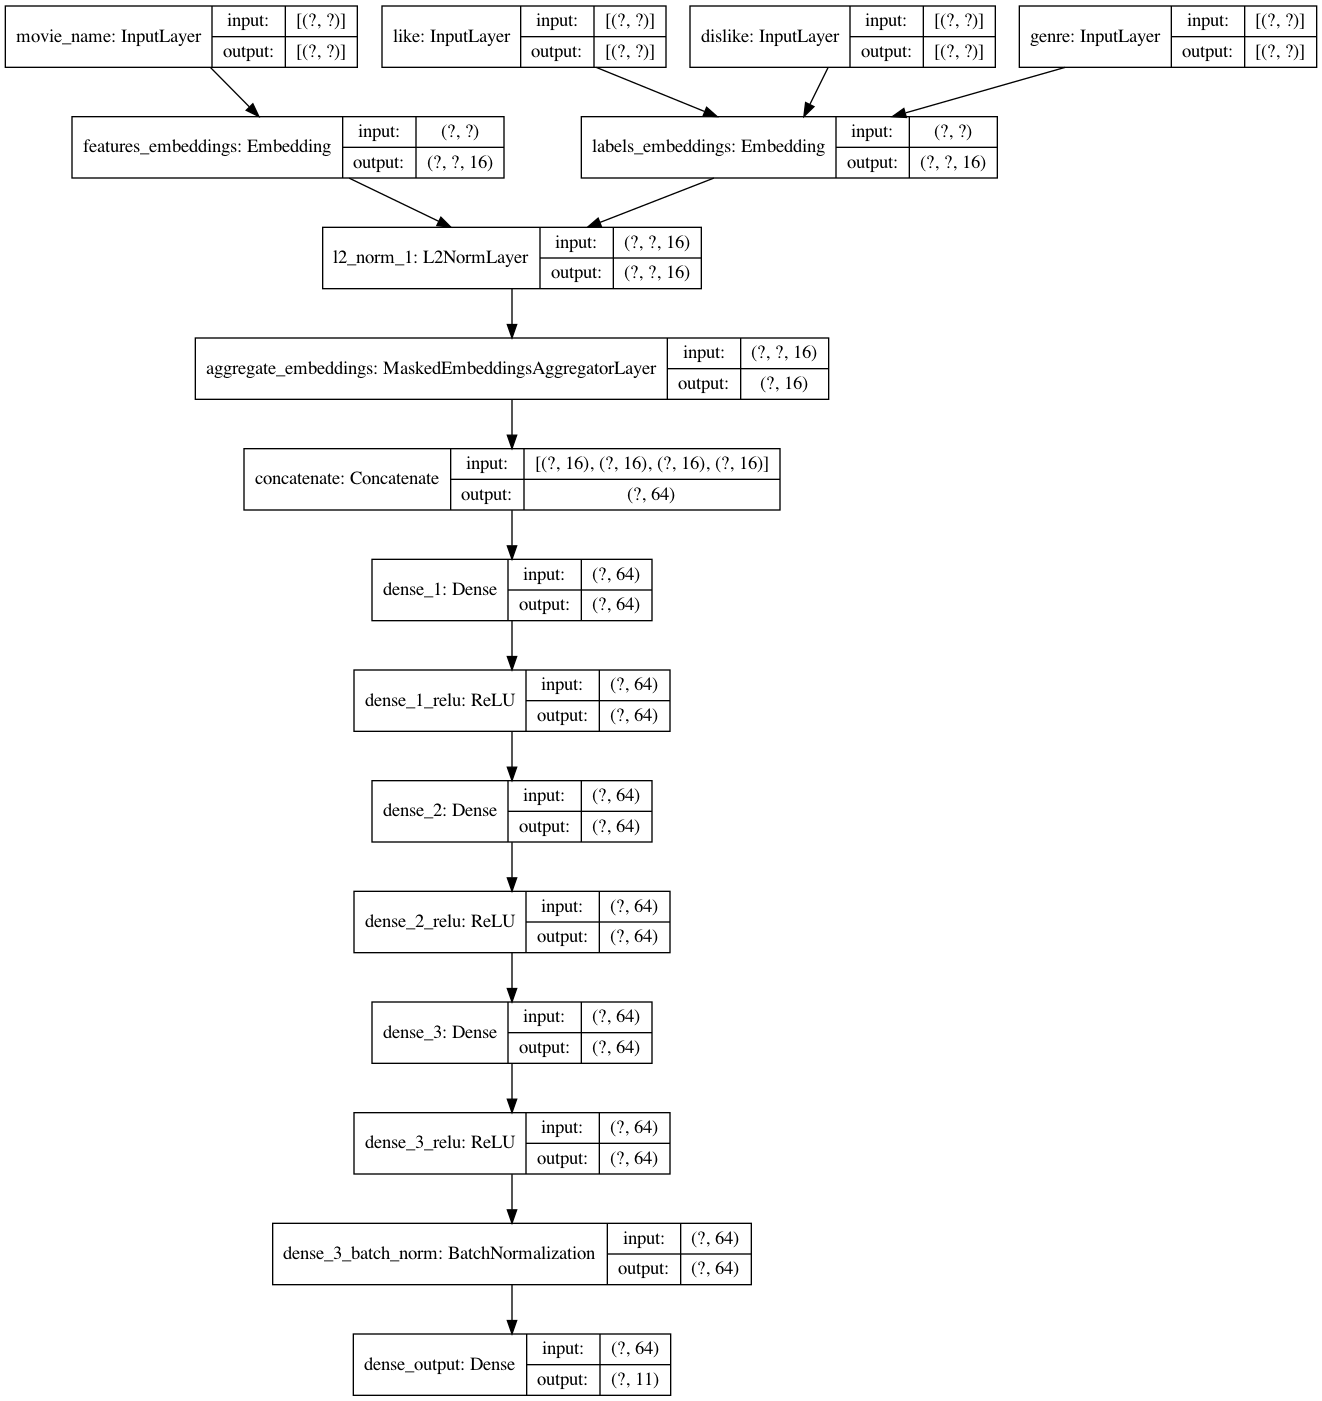

In [80]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,dpi=96)

In [81]:
model.fit([tf.keras.preprocessing.sequence.pad_sequences(user_title_list['title_d']),
           tf.keras.preprocessing.sequence.pad_sequences(user_title_list['like']),
           tf.keras.preprocessing.sequence.pad_sequences(user_title_list['dislike']),
            tf.keras.preprocessing.sequence.pad_sequences(user_title_list['all_genres'])
           ],user_title_list['predict_labels'].values,callbacks=[tensorboard_callback],
           steps_per_epoch=1, epochs=100,verbose=1)

Epoch 1/100


InvalidArgumentError:  indices[12] = 30 is not in [0, 30)
	 [[{{node functional_1/aggregate_embeddings/PartitionedCall/RaggedMask/boolean_mask/GatherV2}}]] [Op:__inference_train_function_3465]

Function call stack:
train_function


In [ ]:
model.summary()

In [ ]:
user_title_list_e

In [ ]:
user_title_list

In [ ]:
user_title_list_e['title_d']

In [ ]:
user_title_list


In [ ]:
tf.keras.preprocessing.sequence.pad_sequences(user_title_list_e['all_genres'])